# Importing Libraries & Data

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [235]:
df_lf = pd.read_csv('../../src/data/df_lf_arima.csv', index_col='time', parse_dates=['time'])
df_lf.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0


---

# FSM- Random Walk Model

### only doing zip code **60657**

In [236]:
# isolating zip code 60657

df_60657 = df_lf[(df_lf.RegionName == 60657)]
df_60657.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-05-01,84654,60657,Chicago,IL,Chicago,Cook,1,335400.0
1996-06-01,84654,60657,Chicago,IL,Chicago,Cook,1,336500.0
1996-07-01,84654,60657,Chicago,IL,Chicago,Cook,1,337600.0
1996-08-01,84654,60657,Chicago,IL,Chicago,Cook,1,338500.0


In [237]:
# checking shape

df_60657.shape

(265, 8)

In [238]:
# creating train/test split

eotindex_df_60657 = round(df_60657.shape[0] * 0.8)

df_60657_train = df_60657.value[:eotindex_df_60657]
df_60657_test = df_60657.value[eotindex_df_60657:]

In [239]:
random_walk = df_60657_train.shift(1)

In [240]:
df_60657_train.head()

time
1996-04-01    334200.0
1996-05-01    335400.0
1996-06-01    336500.0
1996-07-01    337600.0
1996-08-01    338500.0
Name: value, dtype: float64

In [241]:
random_walk.head()

time
1996-04-01         NaN
1996-05-01    334200.0
1996-06-01    335400.0
1996-07-01    336500.0
1996-08-01    337600.0
Name: value, dtype: float64

In [242]:
random_walk.dropna().head()

time
1996-05-01    334200.0
1996-06-01    335400.0
1996-07-01    336500.0
1996-08-01    337600.0
1996-09-01    338500.0
Name: value, dtype: float64

In [243]:
# getting rmse between train[1:] and random_walk

from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(df_60657_train[1:], random_walk.dropna()))

5057.611222664396

In [245]:
from statsmodels.tsa.arima_model import ARIMA

rw = ARIMA(df_60657_train, (0,1,0), freq='MS').fit()
y_hat_rw = rw.predict(typ='levels')
rmse_rw = np.sqrt(mean_squared_error(df_60657_train[1:], y_hat_rw))

y_hat_test_rw = rw.predict(start='2013-12-01', end='2018-04-01', typ='levels')
rmse_test_rw = np.sqrt(mean_squared_error(df_60657_test, y_hat_test_rw))

print(rw.summary())
print(rmse_rw)
print(rmse_test_rw)

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  211
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2070.318
Method:                           css   S.D. of innovations           4416.019
Date:                Tue, 10 Nov 2020   AIC                           4144.635
Time:                        22:57:07   BIC                           4151.339
Sample:                    05-01-1996   HQIC                          4147.345
                         - 11-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2465.4028    304.011      8.110      0.000    1869.552    3061.254
4416.018579940594
33134.3550595611


---

In [80]:
df_60657_train

time
1996-04-01    334200.0
1996-05-01    335400.0
1996-06-01    336500.0
1996-07-01    337600.0
1996-08-01    338500.0
                ...   
2013-07-01    848100.0
2013-08-01    853800.0
2013-09-01    856700.0
2013-10-01    856600.0
2013-11-01    854400.0
Name: value, Length: 212, dtype: float64

In [89]:
i2 = ARIMA(df_60657_train, (2,2,4), freq='MS').fit()
y_hat_i2 = i2.predict(typ='levels')
rmse_i2 = np.sqrt(mean_squared_error(df_60657_train[2:], y_hat_i2))

y_hat_i2_test = i2.predict(start='2013-12-01', end='2018-04-01', typ='levels')
rmse_i2_test = np.sqrt(mean_squared_error(df_60657_test, y_hat_i2_test))

print(i2.summary())
print(rmse_i2)
print(rmse_i2_test)

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  210
Model:                 ARIMA(2, 2, 4)   Log Likelihood               -1765.571
Method:                       css-mle   S.D. of innovations           1075.882
Date:                Tue, 10 Nov 2020   AIC                           3547.142
Time:                        16:17:29   BIC                           3573.918
Sample:                    06-01-1996   HQIC                          3557.967
                         - 11-01-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0863     67.355     -0.001      0.999    -132.100     131.928
ar.L1.D2.value     0.3530      0.297      1.188      0.235      -0.230       0.936
ar.L2.D2.value     0.2387      0.115

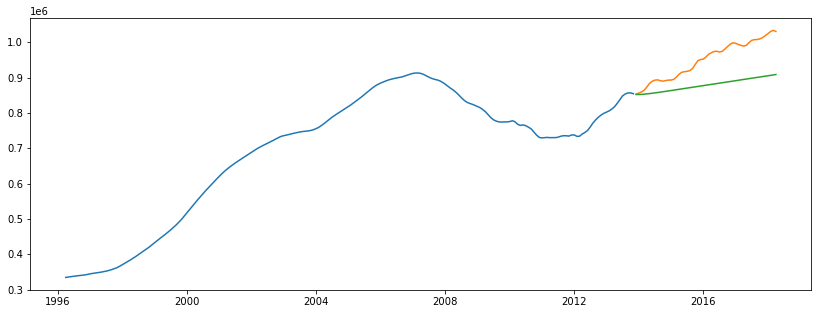

In [92]:
plt.subplots(figsize=(14,5))
plt.plot(df_60657_train)
plt.plot(df_60657_test)
plt.plot(y_hat_i2_test)

---

In [26]:
ar1 = ARIMA(df_60657_train, (1,1,0), freq='MS').fit()
y_hat_ar1 = ar1.predict(typ='levels')
rmse_ar1 = np.sqrt(mean_squared_error(df_60657_train[1:], y_hat_ar1))

y_hat_test_ar1 = ar1.predict(start='2013-12-01', end='2018-04-01', typ='levels')
rmse_test_ar1 = np.sqrt(mean_squared_error(df_60657_test, y_hat_test_ar1))

print(ar1.summary())
print(rmse_ar1)
print(rmse_test_ar1)

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  211
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1831.153
Method:                       css-mle   S.D. of innovations           1414.020
Date:                Tue, 10 Nov 2020   AIC                           3668.307
Time:                        12:17:37   BIC                           3678.363
Sample:                    05-01-1996   HQIC                          3672.372
                         - 11-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2098.3687   1662.053      1.263      0.207   -1159.194    5355.932
ar.L1.D.value     0.9456      0.021     44.564      0.000       0.904       0.987
                                    Root

---

In [27]:
ar2 = ARIMA(df_60657_train, (2,1,0), freq='MS').fit()
y_hat_ar2 = ar2.predict(typ='levels')
rmse_ar2 = np.sqrt(mean_squared_error(df_60657_train[1:], y_hat_ar2))

y_hat_test_ar2 = ar2.predict(start='2013-12-01', end='2018-04-01', typ='levels')
rmse_test_ar2 = np.sqrt(mean_squared_error(df_60657_test, y_hat_test_ar2))

print(ar2.summary())
print(rmse_ar2)
print(rmse_test_ar2)

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  211
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1817.560
Method:                       css-mle   S.D. of innovations           1324.902
Date:                Tue, 10 Nov 2020   AIC                           3643.120
Time:                        12:17:38   BIC                           3656.527
Sample:                    05-01-1996   HQIC                          3648.539
                         - 11-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2226.9773   1232.138      1.807      0.071    -187.969    4641.924
ar.L1.D.value     1.2769      0.065     19.788      0.000       1.150       1.403
ar.L2.D.value    -0.3484      0.065     

In [28]:
print(rmse_rw)
print(rmse_ar1)
print(rmse_ar2)

4416.018579940594
1415.2285558262665
1326.6212480746779


In [29]:
print(rmse_test_rw)
print(rmse_test_ar1)
print(rmse_test_ar2)

33134.3550595611
98250.83876977155
79799.8258968787


---

# FSM post 2010

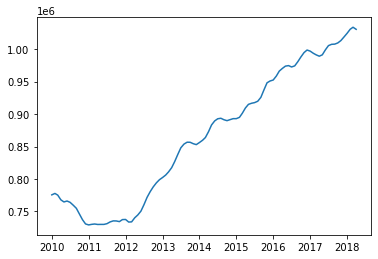

In [30]:
plt.plot(df_lf[(df_lf.RegionName == 60657) & (df_lf.index.year >= 2010)]['value']);

In [31]:
df_60657.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-05-01,84654,60657,Chicago,IL,Chicago,Cook,1,335400.0
1996-06-01,84654,60657,Chicago,IL,Chicago,Cook,1,336500.0
1996-07-01,84654,60657,Chicago,IL,Chicago,Cook,1,337600.0
1996-08-01,84654,60657,Chicago,IL,Chicago,Cook,1,338500.0


In [32]:
df_60657_post_2010 = df_60657[df_60657.index.year >= 2010]
eotindex_df_60657_post_2010 = round(df_60657_post_2010.shape[0] * 0.8)
df_60657_post_2010_train = df_60657_post_2010.value[:eotindex_df_60657_post_2010]
df_60657_post_2010_test = df_60657_post_2010.value[eotindex_df_60657_post_2010:]

In [33]:
df_60657_post_2010.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
2010-01-01,84654,60657,Chicago,IL,Chicago,Cook,1,775600.0
2010-02-01,84654,60657,Chicago,IL,Chicago,Cook,1,777800.0
2010-03-01,84654,60657,Chicago,IL,Chicago,Cook,1,775200.0
2010-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,767900.0
2010-05-01,84654,60657,Chicago,IL,Chicago,Cook,1,764700.0


In [34]:
print(df_60657_post_2010_train.shape, df_60657_post_2010_test.shape)

(80,) (20,)


In [35]:
df_60657_post_2010_test

time
2016-09-01     980800.0
2016-10-01     988000.0
2016-11-01     994700.0
2016-12-01     998700.0
2017-01-01     997000.0
2017-02-01     993700.0
2017-03-01     991300.0
2017-04-01     989200.0
2017-05-01     991300.0
2017-06-01     999100.0
2017-07-01    1005500.0
2017-08-01    1007500.0
2017-09-01    1007800.0
2017-10-01    1009600.0
2017-11-01    1013300.0
2017-12-01    1018700.0
2018-01-01    1024400.0
2018-02-01    1030700.0
2018-03-01    1033800.0
2018-04-01    1030600.0
Name: value, dtype: float64

In [36]:
rw_2010 = ARIMA(df_60657_post_2010_train, (0,1,0), freq='MS').fit()
y_hat_rw_2010 = rw_2010.predict(typ='levels')
rmse_rw_2010 = np.sqrt(mean_squared_error(df_60657_post_2010_train[1:], y_hat_rw_2010))

y_hat_rw_2010_test = rw_2010.predict(start='2016-09-01', end='2018-04-01', typ='levels')
rmse_rw_2010_test = np.sqrt(mean_squared_error(df_60657_post_2010_test, y_hat_rw_2010_test))

print(rw_2010.summary())
print(rmse_rw_2010)
print(rmse_rw_2010_test)

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   79
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -779.049
Method:                           css   S.D. of innovations           4639.841
Date:                Tue, 10 Nov 2020   AIC                           1562.097
Time:                        12:17:40   BIC                           1566.836
Sample:                    02-01-2010   HQIC                          1563.996
                         - 08-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2515.1899    522.023      4.818      0.000    1492.044    3538.336
4639.840913019034
7191.780818707958


In [37]:
ar1_2010 = ARIMA(df_60657_post_2010_train, (1,1,0), freq='MS').fit()
y_hat_ar1_2010 = ar1_2010.predict(typ='levels')
rmse_ar1_2010 = np.sqrt(mean_squared_error(df_60657_post_2010_train[1:], y_hat_ar1_2010))

y_hat_ar1_2010_test = ar1_2010.predict(start='2016-09-01', end='2018-04-01', typ='levels')
rmse_ar1_2010_test = np.sqrt(mean_squared_error(df_60657_post_2010_test, y_hat_ar1_2010_test))

print(ar1_2010.summary())
print(rmse_ar1_2010)
print(rmse_ar1_2010_test)

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   79
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -739.563
Method:                       css-mle   S.D. of innovations           2797.462
Date:                Tue, 10 Nov 2020   AIC                           1485.126
Time:                        12:17:40   BIC                           1492.235
Sample:                    02-01-2010   HQIC                          1487.974
                         - 08-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2495.3877   1422.421      1.754      0.079    -292.506    5283.282
ar.L1.D.value     0.7885      0.066     11.918      0.000       0.659       0.918
                                    Root

In [38]:
ar2_2010 = ARIMA(df_60657_post_2010_train, (2,1,0), freq='MS').fit()
y_hat_ar2_2010 = ar2_2010.predict(typ='levels')
rmse_ar2_2010 = np.sqrt(mean_squared_error(df_60657_post_2010_train[1:], y_hat_ar2_2010))

y_hat_ar2_2010_test = ar2_2010.predict(start='2016-09-01', end='2018-04-01', typ='levels')
rmse_ar2_2010_test = np.sqrt(mean_squared_error(df_60657_post_2010_test, y_hat_ar2_2010_test))

print(ar2_2010.summary())
print(rmse_ar2_2010)
print(rmse_ar2_2010_test)

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   79
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -732.150
Method:                       css-mle   S.D. of innovations           2540.268
Date:                Tue, 10 Nov 2020   AIC                           1472.300
Time:                        12:17:41   BIC                           1481.777
Sample:                    02-01-2010   HQIC                          1476.097
                         - 08-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2653.9776    960.592      2.763      0.006     771.253    4536.702
ar.L1.D.value     1.1277      0.103     10.961      0.000       0.926       1.329
ar.L2.D.value    -0.4219      0.104     

In [195]:
print(rmse_rw, rmse_rw_2010)
print(rmse_ar1, rmse_ar1_2010)
print(rmse_ar2, rmse_ar2_2010)

4416.018579940594 4639.840913019034
1415.2285558262665 2797.5845159676855
1326.6212480746779 2551.224406372213


In [40]:
print(rmse_test_rw, rmse_rw_2010_test)
print(rmse_test_ar1, rmse_ar1_2010_test)
print(rmse_test_ar2, rmse_ar2_2010_test)

33134.3550595611 7191.780818707958
98250.83876977155 9002.837243025557
79799.8258968787 6036.285568965864


---

# 30331

In [163]:
df_atl[df_atl.City == 'Atlanta']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
2010-01-01,71050,30331,Atlanta,GA,Atlanta,Fulton,228,114600.0
2010-02-01,71050,30331,Atlanta,GA,Atlanta,Fulton,228,114300.0
2010-03-01,71050,30331,Atlanta,GA,Atlanta,Fulton,228,111800.0
2010-04-01,71050,30331,Atlanta,GA,Atlanta,Fulton,228,106600.0
2010-05-01,71050,30331,Atlanta,GA,Atlanta,Fulton,228,101600.0
...,...,...,...,...,...,...,...,...
2017-12-01,71050,30331,Atlanta,GA,Atlanta,Fulton,228,137000.0
2018-01-01,71050,30331,Atlanta,GA,Atlanta,Fulton,228,139400.0
2018-02-01,71050,30331,Atlanta,GA,Atlanta,Fulton,228,140800.0


shape of train and test datasets: (212,) (53,) 

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  210
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1787.879
Method:                       css-mle   S.D. of innovations           1203.807
Date:                Tue, 10 Nov 2020   AIC                           3585.758
Time:                        19:15:41   BIC                           3602.494
Sample:                    06-01-1996   HQIC                          3592.524
                         - 11-01-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9831     64.992      0.015      0.988    -126.400     128.366
ar.L1.D2.value     0.6483      0.118      5.514      0.000       0.418

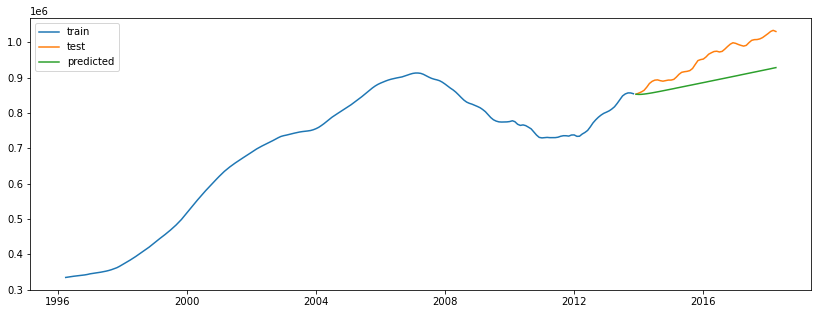

In [208]:
zip_code = 60657    # change these params
start_year = 1996   # change these params (1996 or 2010)
ar, i, ma = [1,2,2] # change these params

df_zip_code = df_lf[(df_lf.RegionName== zip_code) & (df_lf.index.year >= start_year)]

eoti = round(df_zip_code.shape[0] * .8)
df_zip_code_train = df_zip_code.value[:eoti]
df_zip_code_test = df_zip_code.value[eoti:]

print("shape of train and test datasets:", df_zip_code_train.shape, df_zip_code_test.shape, '\n')

model = ARIMA(df_zip_code_train, (ar,i,ma), freq='MS').fit()
y_hat_model = model.predict(typ='levels')
rmse_model = np.sqrt(mean_squared_error(df_zip_code_train[i:], y_hat_model))


test_start_dt = df_zip_code_test.index[0]
test_end_dt = df_zip_code_test.index[-1]
y_hat_model_test = model.predict(start=test_start_dt, end=test_end_dt, typ='levels')
rmse_model_test = np.sqrt(mean_squared_error(df_zip_code_test, y_hat_model_test))

print(model.summary(), '\n')
print('train rmse:', rmse_model, '\n')
print('test rmse:', rmse_model_test, '\n')

plt.subplots(figsize=(14,5))
plt.plot(df_zip_code_train, label='train')
plt.plot(df_zip_code_test, label='test')
plt.plot(y_hat_model_test, label='predicted')
plt.legend(loc="upper left");

shape of train and test datasets: (80,) (20,) 

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   78
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -715.071
Method:                       css-mle   S.D. of innovations           2268.021
Date:                Tue, 10 Nov 2020   AIC                           1440.142
Time:                        22:49:26   BIC                           1451.925
Sample:                    03-01-2010   HQIC                          1444.859
                         - 08-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             78.4541     43.165      1.818      0.069      -6.149     163.057
ar.L1.D2.value     0.5823      0.100      5.822      0.000       0.386 

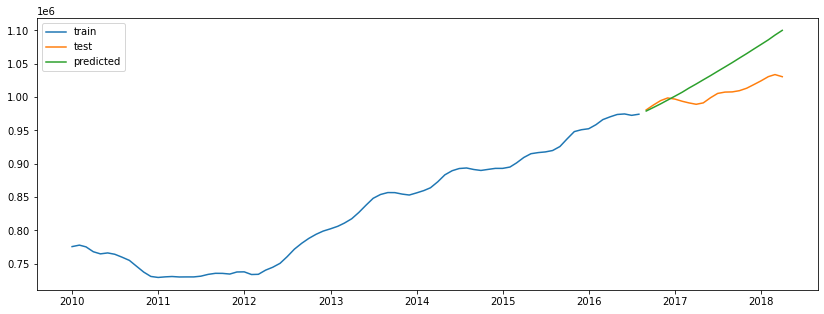

In [232]:
zip_code = 60657    # change these params
start_year = 2010   # change these params (1996 or 2010)
ar, i, ma = [1,2,2] # change these params

df_zip_code = df_lf[(df_lf.RegionName== zip_code) & (df_lf.index.year >= start_year)]

eoti = round(df_zip_code.shape[0] * .8)
df_zip_code_train = df_zip_code.value[:eoti]
df_zip_code_test = df_zip_code.value[eoti:]

print("shape of train and test datasets:", df_zip_code_train.shape, df_zip_code_test.shape, '\n')

model = ARIMA(df_zip_code_train, (ar,i,ma), freq='MS').fit()
y_hat_model = model.predict(typ='levels')
rmse_model = np.sqrt(mean_squared_error(df_zip_code_train[i:], y_hat_model))

test_start_dt = df_zip_code_test.index[0]
test_end_dt = df_zip_code_test.index[-1]
y_hat_model_test = model.predict(start=test_start_dt, end=test_end_dt, typ='levels')
rmse_model_test = np.sqrt(mean_squared_error(df_zip_code_test, y_hat_model_test))

print(model.summary(), '\n')
print('train rmse:', rmse_model, '\n')
print('test rmse:', rmse_model_test, '\n')

plt.subplots(figsize=(14,5))
plt.plot(df_zip_code_train, label='train')
plt.plot(df_zip_code_test, label='test')
plt.plot(y_hat_model_test, label='predicted')
plt.legend(loc="upper left");

shape of train and test datasets: (61,) (15,) 

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   59
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -539.673
Method:                       css-mle   S.D. of innovations           2206.611
Date:                Tue, 10 Nov 2020   AIC                           1089.346
Time:                        19:40:43   BIC                           1099.734
Sample:                    03-01-2012   HQIC                          1093.401
                         - 01-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -30.6452     58.870     -0.521      0.603    -146.027      84.737
ar.L1.D2.value     0.5415      0.130      4.166      0.000       0.287 

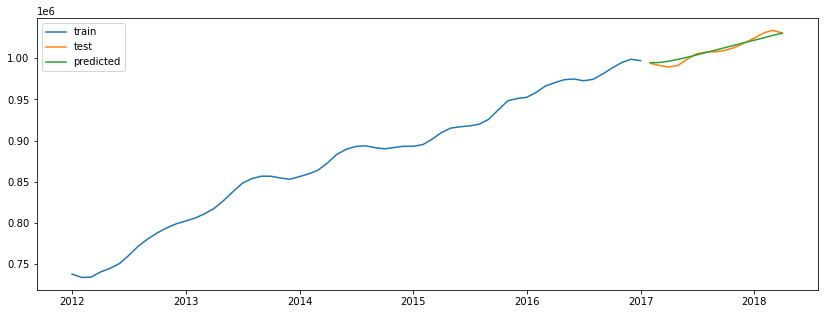

In [229]:
zip_code = 60657    # change these params
start_year = 2012   # change these params (1996 or 2010)
ar, i, ma = [1,2,2] # change these params

df_zip_code = df_lf[(df_lf.RegionName== zip_code) & (df_lf.index.year >= start_year)]

eoti = round(df_zip_code.shape[0] * .8)
df_zip_code_train = df_zip_code.value[:eoti]
df_zip_code_test = df_zip_code.value[eoti:]

print("shape of train and test datasets:", df_zip_code_train.shape, df_zip_code_test.shape, '\n')

model = ARIMA(df_zip_code_train, (ar,i,ma), freq='MS').fit()
y_hat_model = model.predict(typ='levels')
rmse_model = np.sqrt(mean_squared_error(df_zip_code_train[i:], y_hat_model))

test_start_dt = df_zip_code_test.index[0]
test_end_dt = df_zip_code_test.index[-1]
y_hat_model_test = model.predict(start=test_start_dt, end=test_end_dt, typ='levels')
rmse_model_test = np.sqrt(mean_squared_error(df_zip_code_test, y_hat_model_test))

print(model.summary(), '\n')
print('train rmse:', rmse_model, '\n')
print('test rmse:', rmse_model_test, '\n')
print('model aic:', model.aic, '\n')

plt.subplots(figsize=(14,5))
plt.plot(df_zip_code_train, label='train')
plt.plot(df_zip_code_test, label='test')
plt.plot(y_hat_model_test, label='predicted')
plt.legend(loc="upper left");

In [214]:
from statsmodels.tsa.stattools import adfuller

def dicky_fuller(df):
    i = 0
    dftest = adfuller(np.diff(df,i), autolag='AIC')
    test_stat = dftest[0]
    critical_val_5 = dftest[4]['5%']
    while test_stat > critical_val_5:
        i+=1
        dftest = adfuller(np.diff(df,i), autolag='AIC')
        test_stat = dftest[0]
        critical_val_5 = dftest[4]['5%']
    return(i)
    
dicky_fuller(df_zip_code_train)

3